# Importing Libraries

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Reading Data

In [77]:
data=pd.read_csv("titanic_dataset.csv") 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Identifying Data

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Shape of Data 
#### (This means dataset has 891 records and 11 columns)

In [79]:
data.shape

(891, 12)

## Finding out columns with missing entries

In [80]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Using a data dictionary dataframe to examine the dataset

In [81]:
datadict = pd.DataFrame(data.dtypes) #Display Datatypes
datadict = datadict.rename(columns={0:'DataType'}) # Renaming column to DataType
datadict['MissingVal'] = data.isnull().sum() #Display Number of Missing Values
datadict['NUnique']=data.nunique() #Display Number of Unique Values
datadict['Count']=data.count() #Display the Count for each column
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


## Describing Object Datatypes

In [82]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Describing Numerical Datatypes

In [83]:
data.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Analysis

#### Analyzing percentage of passengers survived

In [84]:
data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

i.e. about 38% of passengers survived whereas about 61% of passengers didn't survive the Titanic disaster.

#### Univariate Analysis

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

<AxesSubplot:xlabel='Age', ylabel='Density'>

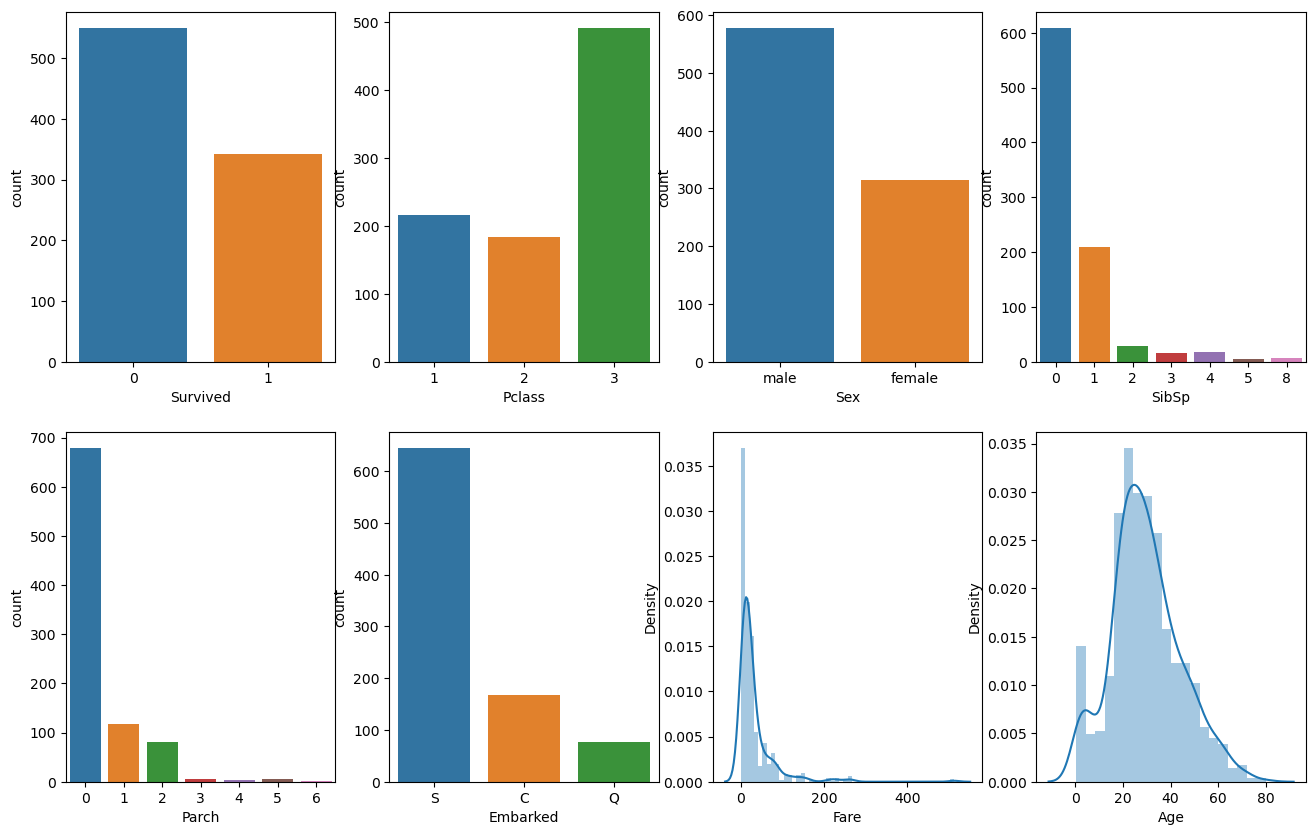

In [85]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=data,ax=axes[0,0])
sns.countplot('Pclass',data=data,ax=axes[0,1])
sns.countplot('Sex',data=data,ax=axes[0,2])
sns.countplot('SibSp',data=data,ax=axes[0,3])
sns.countplot('Parch',data=data,ax=axes[1,0])
sns.countplot('Embarked',data=data,ax=axes[1,1])
sns.distplot(data['Fare'], kde=True,ax=axes[1,2])
sns.distplot(data['Age'].dropna(),kde=True,ax=axes[1,3])

#### Bivariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

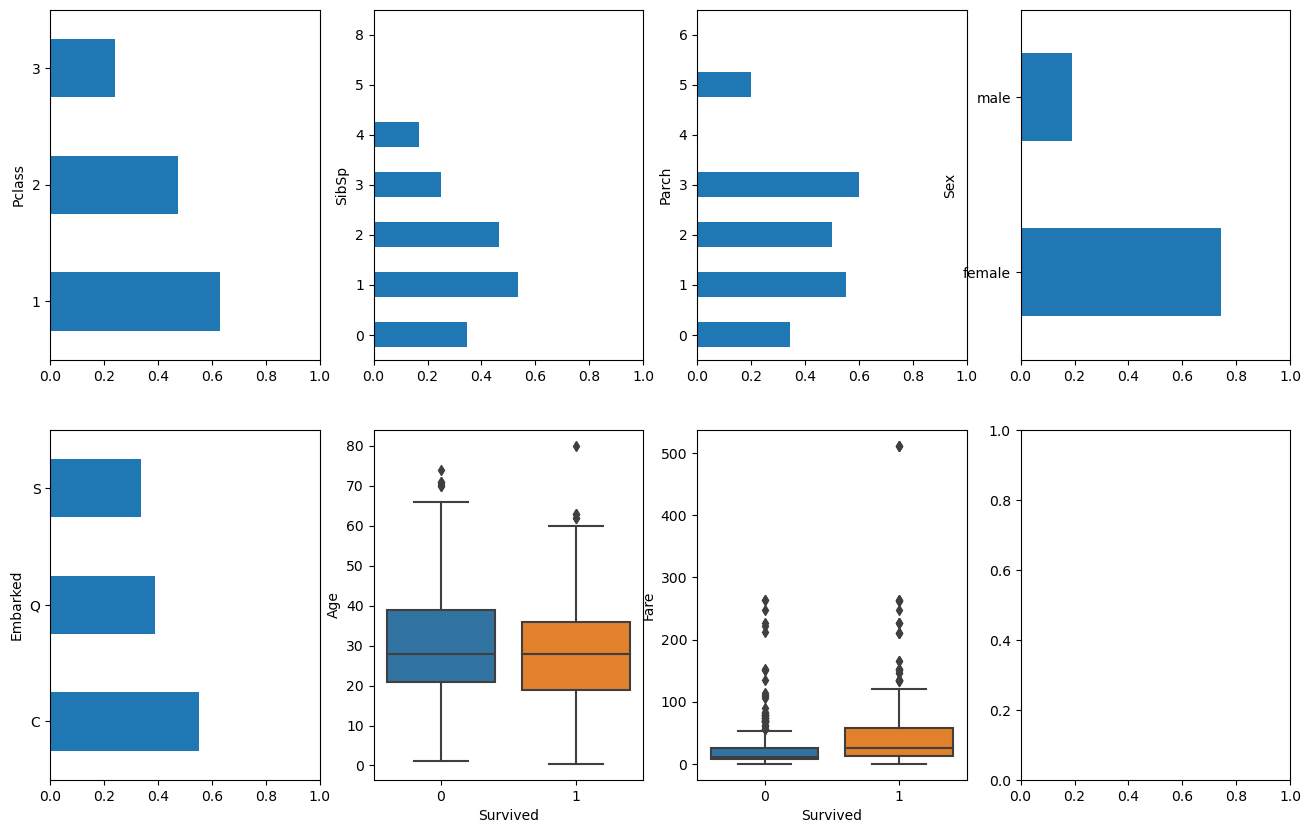

In [86]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])

* Comparing the male and female survival rates, female passengers are more likely to survive.

* Pclass is also related to the survival rates with passengers of Pclass 1 having the best survuval rates of about 60% whereas passengers of Pclass 3 having the worst survuval rates of about 25%.

* Fare is also tied to survuval rates as seen in the plot.


#### Multivariate Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_3832\1489348742.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

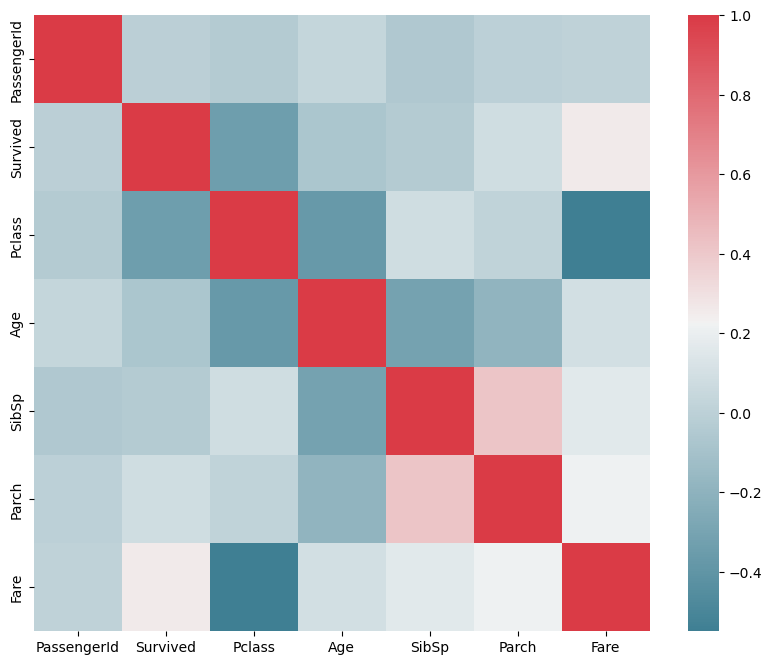

In [87]:
#Constucting a heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

There is a:
* Positve coorelation between Fare and Survived.
* Negative coorelation between Pclass and Survived.
* Negative coorelation between Fare and Pclass.
* Negative coorelation between Age and Plcass.

# Data Preprocessing


In [88]:
# Splitting data into categorical and numerical data
numerical_features=[]
categorical_features=[]
for column in data.columns:
    datatype=data[column].dtype
    if datatype=='int64' or datatype=='float64':
        numerical_features.append(column)
    else:
        categorical_features.append(column)
print("Numerical Features:",numerical_features,'\n','Categorical Features:',categorical_features)

Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
 Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [89]:
#replacing null values with mean values
data['Age'].fillna(data["Age"].mean(),inplace=True)

In [90]:
#Extracting new features
data['FamilyCount']=data['SibSp']+data['Parch']

In [91]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [92]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [93]:
data[['FamilyCount','Survived']].groupby(['FamilyCount']).mean().sort_values(by='Survived')

,Survived
FamilyCount,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


# Conclusion
Females had higher survival rates.
Passengers belonging to first class had higher survival rates.
Passengers hvaing three family members had highest survival rates.

In [94]:
# Extracting a new feature 'Title' because it  will be useful for modelling

data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [95]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace(['Mlle','Ms'], 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [96]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


Now we can drop the "Name" feature and use titles to predict survial of passengers

In [ ]:
# Dropping Name and PassengerId features because they are not useful
data=data.drop(['PassengerId','Name'],axis=1)

In [103]:
# Creating new column mentioning whether a passenger has a cabin assigned or not
x=data['Cabin'].isnull()
value={True:0,False:1}
x=x.map(value)
data['Has Cabin']=x

# Checking the dataset
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,Has Cabin
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,3,1
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1,0


In [106]:
sex_map={'female':1,'male':0}
data['Sex']=data.Sex.map(sex_map)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,Has Cabin
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,3,1
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,1,3,1
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,1,0


In [112]:
# Creating a new feature "IsAlone"
data[['Survived','FamilyCount']].groupby(["FamilyCount"]).mean()

,Survived
FamilyCount,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [114]:
alone_map={0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,10:1}
data['IsAlone']=data.FamilyCount.map(alone_map)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,Has Cabin,IsAlone
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,3,1,1
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,1,3,1,1
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0


In [116]:
data[['IsAlone','Survived']].groupby('IsAlone').mean()

,Survived
IsAlone,
0,0.303538
1,0.505650


In [117]:
data = data.drop(['Parch', 'SibSp'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,Has Cabin,IsAlone
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,1,1,0,1
1,1,1,1,38.0,PC 17599,71.2833,C85,C,1,3,1,1
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0
3,1,1,1,35.0,113803,53.1000,C123,S,1,3,1,1
4,0,3,0,35.0,373450,8.0500,NaN,S,0,1,0,0


In [119]:
# Filling the missing values in Embarked with the most common port
freq_port = data.Embarked.mode()[0]
freq_port

'S'

In [120]:
data['Embarked']=data['Embarked'].fillna(freq_port)
data[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


In [121]:
data['Embarked']=data['Embarked'].map({'S':0,"Q":1,"C":2})
data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,Has Cabin,IsAlone
0,0,3,0,22.0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,1,1,1,38.0,PC 17599,71.2833,C85,2,1,3,1,1
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,0,0,2,0,0
3,1,1,1,35.0,113803,53.1000,C123,0,1,3,1,1
4,0,3,0,35.0,373450,8.0500,NaN,0,0,1,0,0


# Importing Libraries for ML Modelling


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Using Logistic Regression


In [122]:
data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,Has Cabin,IsAlone
0,0,3,0,22.0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,1,1,1,38.0,PC 17599,71.2833,C85,2,1,3,1,1
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,0,0,2,0,0
3,1,1,1,35.0,113803,53.1000,C123,0,1,3,1,1
4,0,3,0,35.0,373450,8.0500,NaN,0,0,1,0,0


In [123]:
X = data[['Pclass','Sex', 'Age','Fare', 'Embarked','FamilyCount','Title','Has Cabin','IsAlone']]
y=data.Survived

In [159]:
X_train,X_val_test,y_train,y_val_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=8)   # Splitting data
X_val,X_test,y_val,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=8)


In [155]:
lr = LogisticRegression(random_state=16)

In [156]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.4

In [163]:
# Make predictions on the training and validation sets
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)
# Print empirical risk on both sets
print('MSE on training set:')
print(mean_squared_error(y_train, y_train_pred))
print('MSE on validation set:')
print(mean_squared_error(y_val, y_val_pred))
print('')

# Print R squared on both sets
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))
print('R squared on validation set:')
print(r2_score(y_val, y_val_pred))

MSE on training set:
0.17275280898876405
MSE on validation set:
0.1760299625468165

R squared on training set:
0.26721389662876216
R squared on validation set:
0.2557491289198607


In [168]:
# Import package for random-number generation and set seed
import random
random.seed(10)

# Create another linear regression object
lr = LogisticRegression()

# Randomly choose 10 inputs without replacement
input_indices = random.sample(range(0, X.shape[0]), 10)

# Train the model using the training set
lr.fit(X_train[:, input_indices], y_train)

# Make predictions on the training and validation sets
y_train_pred = lr.predict(X_train[:,input_indices])
y_val_pred = lr.predict(X_val[:, input_indices])

# Print empirical risk on both sets
print('MSE on training set:')
print(mean_squared_error(y_train, y_train_pred))
print('MSE on validation set:')
print(mean_squared_error(y_val, y_val_pred))
print('')

# Print R squared on both sets
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))
print('R squared on validation set:')
print(r2_score(y_val, y_val_pred))

InvalidIndexError: (slice(None, None, None), [585, 33, 439, 494, 591, 15, 211, 473, 832, 503])

# Using RandomForest Classifier

In [152]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)
acc_rf=knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_rf= accuracy_score(y_test,Y_pred)
acc_rf

0.7309417040358744

# Support Vector Machines

In [148]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test,Y_pred)
acc_svc

0.6860986547085202

# Using KNN Neighbors

In [153]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn == accuracy_score(y_test,Y_pred)
acc_knn

86.38